In [1]:
import anndata
import numpy as np
import pandas as pd
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
hic = anndata.read_h5ad("/home/micl/workspace/lmh_data/Lee2019/scHiC.h5ad")
hic

AnnData object with n_obs × n_vars = 4238 × 309581
    obs: 'domain'
    var: 'chrom', 'start'

In [4]:
hic.obs_names = hic.obs_names.str.split(r"[:_]").map(lambda x: '_'.join(x[:-2]))
hic.obs

,domain
cells,
190315_29yr_6_E11_AD008_ODC,scHiC
181218_21yr_2_B11_AD002_Vip,scHiC
190315_29yr_4_A3_AD006_L5,scHiC
190315_21yr_6_F11_AD012_L23,scHiC
181218_21yr_2_G12_AD010_MP,scHiC
...,...
190305_21yr_2_H6_AD007_MP,scHiC
190305_21yr_2_B1_AD001_OPC,scHiC
190315_21yr_4_C7_AD010_Vip,scHiC


In [5]:
hic_pca = pd.read_csv('/home/micl/workspace/lmh_data/Lee2019/BandNorm/embedding.txt', sep='\t')
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
181218_21yr_2_A1_AD002_L23.txt,890.902763,83.059109,10.409427,3.083012,-49.354259,-32.600687,14.483734,-18.205280,-41.147020,26.329468,...,-75.735664,-3.820232,36.103463,-27.970191,42.335609,-3.901578,82.587591,-25.758200,-22.978127,96.463360
181218_21yr_2_A1_AD004_L23.txt,904.872698,118.306720,-19.466440,-60.319205,-21.003638,18.145742,13.801854,47.763996,-68.598821,-5.905531,...,49.290660,-67.283106,63.113846,-103.293280,326.277678,169.548997,2.469605,53.261816,-125.220526,152.974825
181218_21yr_2_A1_AD006_L6.txt,919.593825,161.310310,-32.728456,-73.150546,-40.742312,-20.245419,7.219258,23.709505,-42.157936,31.101920,...,-115.939807,134.374472,-152.814060,99.921896,-232.474914,98.563518,-60.032190,-6.316850,-56.298253,279.926732
181218_21yr_2_A1_AD008_ODC.txt,847.266348,-202.626888,68.867497,3.661814,9.588173,18.015434,2.675589,-2.031951,-41.755522,-14.324155,...,-2.210585,-21.356662,31.221962,1.551080,10.824116,-24.044750,12.866632,-16.734417,-11.687963,10.222472
181218_21yr_2_A1_AD010_L5.txt,886.009912,56.243458,10.304221,17.604349,-15.108784,12.878859,24.463045,24.169183,-40.195791,15.401737,...,34.124152,-22.576417,32.882791,18.596894,3.256004,-26.359388,11.476817,19.178504,29.270071,52.927332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190315_29yr_6_H9_AD004_ODC.txt,875.749342,-54.474977,62.063033,-3.718579,-26.856854,0.777472,4.115779,11.823778,5.298375,4.900289,...,-11.239674,2.795996,-4.207720,8.334254,-3.466066,3.272328,13.226099,-7.189493,-6.957192,2.088942
190315_29yr_6_H9_AD006_ODC.txt,869.931323,-76.770471,74.170357,-15.045151,-13.061829,20.001922,1.833363,11.767611,-9.040591,-5.036546,...,6.593132,8.693434,0.491497,-0.642918,0.887359,-0.908937,3.024385,-4.100478,7.214831,-5.355590
190315_29yr_6_H9_AD008_L4.txt,912.004776,184.210110,-38.544711,23.696057,-12.341722,20.049228,-4.100016,16.438967,-12.954493,-6.911907,...,-1.795838,1.604240,5.245884,-0.446017,9.135502,4.044941,-9.760894,2.112579,4.890044,0.847785
190315_29yr_6_H9_AD010_Astro.txt,894.382651,66.583788,10.889655,43.946956,85.647281,-63.064850,15.228112,-24.624083,-2.974911,31.133385,...,-4.625787,-19.812551,-10.425295,16.577477,0.681416,-6.781128,-5.698107,1.316502,-2.404099,2.969823


In [6]:
hic_pca.index = hic_pca.index.str.split(".").map(lambda x: x[0])
hic_pca = hic_pca.loc[hic.obs.index]
hic_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
cells,,,,,,,,,,,,,,,,,,,,,
190315_29yr_6_E11_AD008_ODC,871.781631,-72.333254,63.865209,-14.608258,-34.432074,9.476109,12.062783,9.782404,-21.597138,2.173983,...,1.046651,-17.042478,14.882015,-16.534655,1.391168,1.037403,0.538673,5.050615,-3.346549,-9.387006
181218_21yr_2_B11_AD002_Vip,899.521570,45.921524,24.171058,-49.777993,26.439545,22.897166,-15.028630,-20.633081,86.418502,7.517671,...,-20.367953,-41.389145,-14.781687,19.157262,-76.522537,25.832940,-19.830331,-19.379901,23.400929,-20.666634
190315_29yr_4_A3_AD006_L5,910.927240,176.876999,-52.440313,0.090915,-12.977546,14.780844,-3.253028,4.845430,-17.316657,-3.052136,...,1.430656,4.287518,-0.204909,5.015617,-5.961964,5.474950,6.702222,-5.824094,1.618371,-8.200665
190315_21yr_6_F11_AD012_L23,895.118014,113.303367,-10.757518,3.634128,-11.863942,21.572154,-18.377858,24.537773,-18.833498,-17.442221,...,-1.133421,7.014512,-2.394452,2.158924,-4.890967,-3.362944,12.538875,0.422184,16.263263,-0.436824
181218_21yr_2_G12_AD010_MP,858.744546,-225.178006,-95.737815,-36.902689,-7.173654,-26.212862,11.680092,-34.620812,-11.160733,12.925413,...,-8.080701,-5.339622,-5.127203,-28.472476,6.222498,35.060980,20.667730,-1.552784,8.225492,13.769378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190305_21yr_2_H6_AD007_MP,857.498332,-149.184302,-83.695044,-22.429992,-20.709749,-15.070855,8.958101,-7.510331,-34.261582,-36.159327,...,0.125220,16.544760,-9.807549,3.689828,-10.374477,-15.048891,-11.979496,5.252029,11.125054,3.911368
190305_21yr_2_B1_AD001_OPC,881.475294,-40.585908,40.154314,33.735235,51.666098,30.628314,-20.095340,10.426129,61.817539,-21.341536,...,-4.706073,-13.534714,4.893264,4.469470,-5.452570,6.212225,-1.512326,-2.814021,1.630196,-16.041625
190315_21yr_4_C7_AD010_Vip,900.474789,108.554408,-17.448108,39.083229,8.888875,44.529691,-28.568607,46.364711,71.446270,-17.628988,...,20.495377,-65.501270,-10.201661,-11.963391,-48.053869,-2.880644,-39.451852,0.294456,57.935249,23.469849


In [7]:
hic.obs["cell_type"] = hic.obs_names.str.split(r"[:_]").map(lambda x: x[5])
hic.obsm["X_pca"] = hic_pca

del hic_pca; import gc; gc.collect();

In [8]:
hic = hic[hic.obs['cell_type'].isin(['Astro', 'Endo', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip']),:]
hic.obs

,domain,cell_type
cells,,
190315_29yr_6_E11_AD008_ODC,scHiC,ODC
181218_21yr_2_B11_AD002_Vip,scHiC,Vip
190305_21yr_2_B4_AD002_Vip,scHiC,Vip
190315_21yr_4_G1_AD012_Astro,scHiC,Astro
181218_21yr_2_G7_AD004_Astro,scHiC,Astro
...,...,...
181218_21yr_3_D5_AD010_Vip,scHiC,Vip
190315_21yr_6_G12_AD006_OPC,scHiC,OPC
190305_21yr_2_B1_AD001_OPC,scHiC,OPC


In [9]:
rna = anndata.read_h5ad("/home/micl/workspace/lmh_data/Human_M1_10x/scRNA.h5ad")
rna.layers["counts"] = rna.X.copy()
rna

AnnData object with n_obs × n_vars = 22433 × 50281
    obs: 'cell_type', 'domain'
    layers: 'counts'

In [10]:
scglue.data.get_gene_annotation(
    rna, gtf="/home/micl/workspace/lmh_data/public/gencode.v19.annotation.gtf",
    gtf_by="gene_name"
)
rna = rna[:, rna.var.dropna(axis=0, how='all').index]
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
DDX11L1,chr1,11868.0,14412.0
WASH7P,chr1,14362.0,29806.0
MIR1302-2,chr9,27656.0,30891.0
FAM138A,chr1,34553.0,36081.0
OR4G4P,chr1,52472.0,54936.0


In [11]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2

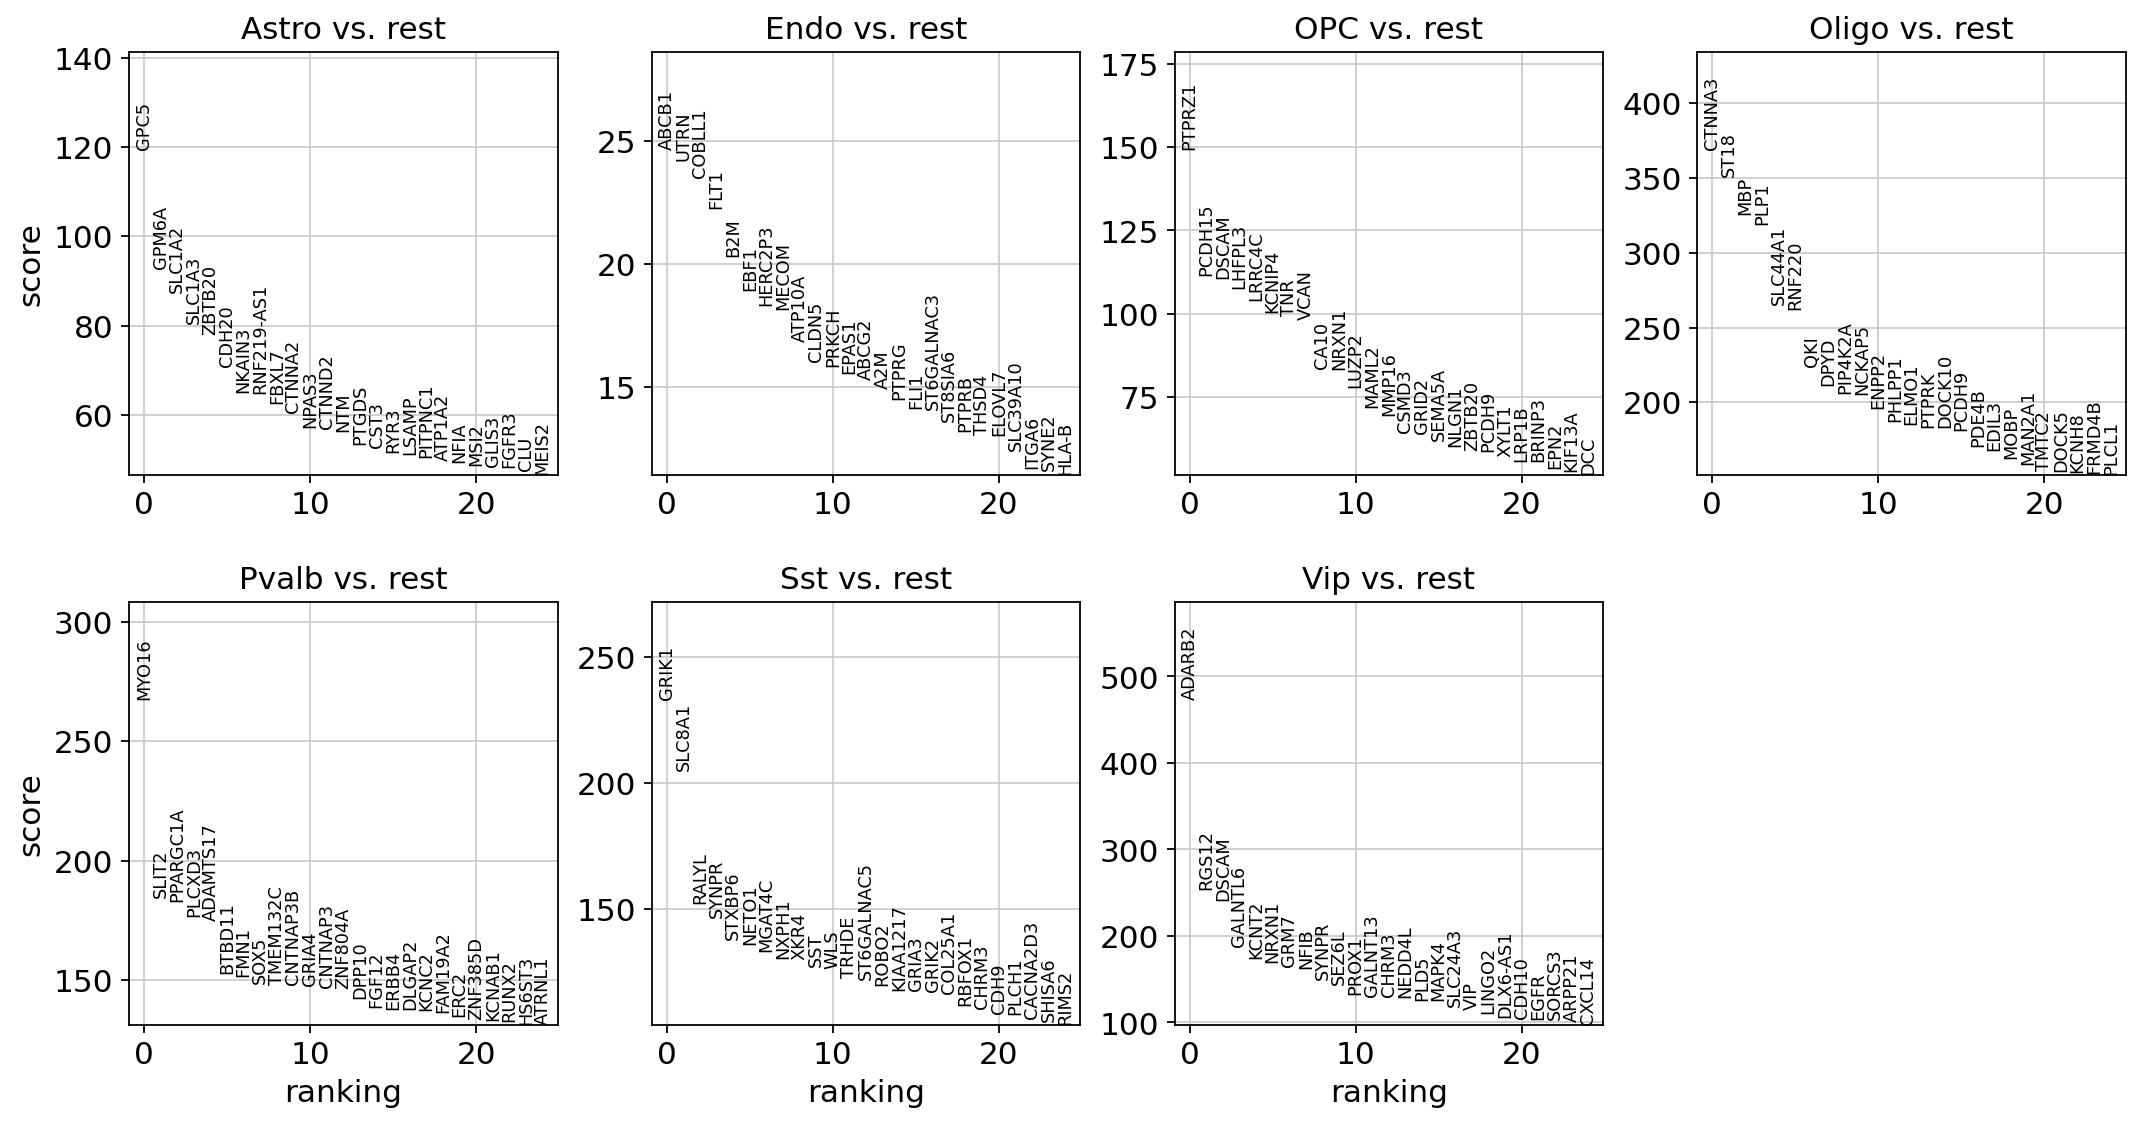

In [12]:
sc.tl.rank_genes_groups(rna, 'cell_type', method='t-test')
sc.pl.rank_genes_groups(rna, n_genes=25, sharey=False)

In [13]:
marker_genes = pd.DataFrame(rna.uns['rank_genes_groups']['names'])[:10]
marker_genes

,Astro,Endo,OPC,Oligo,Pvalb,Sst,Vip
0,GPC5,ABCB1,PTPRZ1,CTNNA3,MYO16,GRIK1,ADARB2
1,GPM6A,UTRN,PCDH15,ST18,SLIT2,SLC8A1,RGS12
2,SLC1A2,COBLL1,DSCAM,MBP,PPARGC1A,RALYL,DSCAM
3,SLC1A3,FLT1,LHFPL3,PLP1,PLCXD3,SYNPR,GALNTL6
4,ZBTB20,B2M,LRRC4C,SLC44A1,ADAMTS17,STXBP6,KCNT2
5,CDH20,EBF1,KCNIP4,RNF220,BTBD11,NETO1,NRXN1
6,NKAIN3,HERC2P3,TNR,QKI,FMN1,MGAT4C,GRM7
7,RNF219-AS1,MECOM,VCAN,DPYD,SOX5,NXPH1,NFIB
8,FBXL7,ATP10A,CA10,PIP4K2A,TMEM132C,XKR4,SYNPR
9,CTNNA2,CLDN5,NRXN1,NCKAP5,CNTNAP3B,SST,SEZ6L


In [14]:
marker_genes_index = marker_genes.values.reshape(-1)
rna.var['marker_genes'] = False
rna.var.loc[marker_genes_index, 'marker_genes'] = True
rna.var

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,...,havana_gene,tag,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,marker_genes
DDX11L1,chr1,11868.0,14412.0,DDX11L1,.,+,.,.,.,.,...,OTTHUMG00000000961.2,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False
WASH7P,chr1,14362.0,29806.0,WASH7P,.,-,.,.,.,.,...,OTTHUMG00000000958.1,NaN,False,NaN,0.013284,0.013376,0.904079,0.00857,0.084148,False
MIR1302-2,chr9,27656.0,30891.0,MIR1302-2,.,+,.,.,.,.,...,OTTHUMG00000019418.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False
FAM138A,chr1,34553.0,36081.0,FAM138A,.,-,.,.,.,.,...,OTTHUMG00000000960.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False
OR4G4P,chr1,52472.0,54936.0,OR4G4P,.,+,.,.,.,.,...,OTTHUMG00000185779.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPTE2P4,chrY,28654359.0,28725837.0,TPTE2P4,.,+,.,.,.,.,...,OTTHUMG00000036765.1,pseudo_consens,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False
SLC25A15P1,chrY,28732788.0,28737748.0,SLC25A15P1,.,-,.,.,.,.,...,OTTHUMG00000036811.1,NaN,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False
PARP4P1,chrY,28740997.0,28780799.0,PARP4P1,.,-,.,.,.,.,...,OTTHUMG00000036812.1,pseudo_consens,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False
FAM58CP,chrY,28772666.0,28773306.0,FAM58CP,.,-,.,.,.,.,...,OTTHUMG00000036813.1,pseudo_consens,False,NaN,0.000000,0.000000,0.000000,0.00000,1.000000,False


In [15]:
rna.var[rna.var['marker_genes']==True]

,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,...,havana_gene,tag,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,marker_genes
RNF220,chr1,44870865.0,45117396.0,RNF220,.,+,.,.,.,.,...,OTTHUMG00000007697.6,ncRNA_host,True,54.0,1.633397,19.891363,5.277870,0.552938,1.142139,True
DPYD,chr1,97543298.0,98386605.0,DPYD,.,-,.,.,.,.,...,OTTHUMG00000039683.3,NaN,True,94.0,1.540498,13.973407,4.058948,0.580011,1.089548,True
TNR,chr1,175284329.0,175712906.0,TNR,.,-,.,.,.,.,...,OTTHUMG00000034876.5,NaN,True,595.0,2.706994,16.864884,1.955942,0.784669,0.805010,True
KCNT2,chr1,196194908.0,196578355.0,KCNT2,.,-,.,.,.,.,...,OTTHUMG00000035611.3,ncRNA_host,True,61.0,2.997459,52.718654,5.125281,0.611961,1.067305,True
SLC8A1,chr2,40324409.0,40838193.0,SLC8A1,.,-,.,.,.,.,...,OTTHUMG00000102183.7,NaN,True,248.0,7.246556,141.110436,2.755749,1.266896,1.291547,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRIK1,chr21,30909253.0,31312351.0,GRIK1,.,-,.,.,.,.,...,OTTHUMG00000078879.1,NaN,True,159.0,26.951277,2199.387471,3.297543,1.955305,1.822247,True
DSCAM,chr21,41382925.0,42219065.0,DSCAM,.,-,.,.,.,.,...,OTTHUMG00000086732.1,ncRNA_host,True,487.0,9.159943,169.155854,2.122101,1.354540,1.383689,True
CLDN5,chr22,19510546.0,19515068.0,CLDN5,.,-,.,.,.,.,...,OTTHUMG00000150441.3,NaN,True,180.0,0.008559,0.029973,3.201898,0.007490,0.134412,True
SEZ6L,chr22,26565439.0,26779562.0,SEZ6L,.,+,.,.,.,.,...,OTTHUMG00000150870.3,NaN,True,637.0,2.060759,10.358692,1.897393,0.693066,0.820022,True


In [33]:
_test = pd.DataFrame(np.log1p(hic.X), columns = hic.var_names)
_test['cell_type'] = list(hic.obs['cell_type'])
_test

,chr1_0,chr1_10000,chr1_20000,chr1_30000,chr1_40000,chr1_50000,chr1_60000,chr1_70000,chr1_80000,chr1_90000,...,chrY_59290000,chrY_59300000,chrY_59310000,chrY_59320000,chrY_59330000,chrY_59340000,chrY_59350000,chrY_59360000,chrY_59370000,cell_type
0,0.0,0.693147,0.0,0.0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ODC
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vip
2,0.0,1.098612,0.0,0.0,0.000000,1.386294,0.000000,1.609438,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vip
3,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.000000,1.098612,1.098612,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Astro
4,0.0,0.000000,0.0,0.0,0.000000,1.098612,0.000000,0.693147,0.693147,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,0.0,0.693147,0.0,0.0,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vip
2620,0.0,1.098612,0.0,0.0,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OPC
2621,0.0,1.791759,0.0,0.0,0.000000,0.693147,1.609438,0.000000,1.098612,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OPC
2622,0.0,1.098612,0.0,0.0,0.000000,0.000000,0.000000,0.693147,1.098612,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vip


In [34]:
__test = _test.groupby('cell_type').mean()
__test

,chr1_0,chr1_10000,chr1_20000,chr1_30000,chr1_40000,chr1_50000,chr1_60000,chr1_70000,chr1_80000,chr1_90000,...,chrY_59280000,chrY_59290000,chrY_59300000,chrY_59310000,chrY_59320000,chrY_59330000,chrY_59340000,chrY_59350000,chrY_59360000,chrY_59370000
cell_type,,,,,,,,,,,,,,,,,,,,,
Astro,0.0,0.687218,0.054556,0.021613,0.051703,0.370301,0.455467,0.247210,0.430985,0.151989,...,0.009263,0.012350,0.009263,0.010806,0.010806,0.016341,0.006175,0.004631,0.024059,0.0
Endo,0.0,0.601944,0.029028,0.013525,0.022265,0.419513,0.533469,0.343795,0.462248,0.156354,...,0.006762,0.006762,0.003381,0.006762,0.013525,0.006762,0.013525,0.003381,0.023668,0.0
ODC,0.0,0.699318,0.043710,0.027932,0.033132,0.346225,0.431215,0.177524,0.356275,0.112581,...,0.014475,0.009465,0.005011,0.016146,0.018467,0.008908,0.007794,0.007563,0.029507,0.0
OPC,0.0,0.638650,0.025899,0.012241,0.062042,0.404850,0.434805,0.186008,0.421805,0.128597,...,0.013658,0.006829,0.006829,0.017073,0.013658,0.006829,0.010244,0.010244,0.027316,0.0
Pvalb,0.0,0.539549,0.031036,0.015518,0.010345,0.312528,0.447392,0.231818,0.401834,0.128448,...,0.000000,0.015518,0.005173,0.005173,0.005173,0.000000,0.005173,0.000000,0.028890,0.0
Sst,0.0,0.646221,0.022360,0.025554,0.027422,0.353959,0.442281,0.213966,0.391753,0.103844,...,0.003194,0.012777,0.003194,0.014645,0.017840,0.000000,0.003194,0.009583,0.025554,0.0
Vip,0.0,0.609648,0.024321,0.033117,0.028374,0.393520,0.420729,0.272829,0.482348,0.106318,...,0.008107,0.016214,0.000000,0.016214,0.008107,0.012160,0.008107,0.008107,0.030746,0.0


In [35]:
__test.mean(axis=1)

cell_type
Astro    1.890088
Endo     1.805593
ODC      2.028806
OPC      1.857193
Pvalb    1.671216
Sst      1.766012
Vip      1.771381
dtype: float32

<AxesSubplot:>

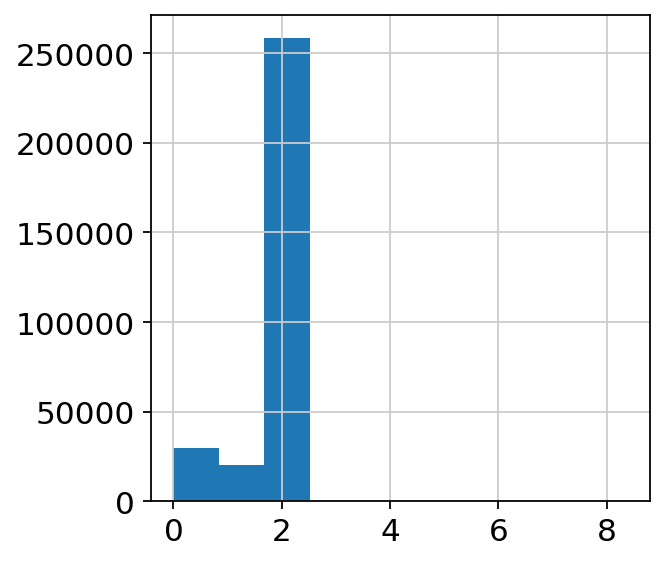

In [36]:
__test.loc['Astro'].hist()

<AxesSubplot:>

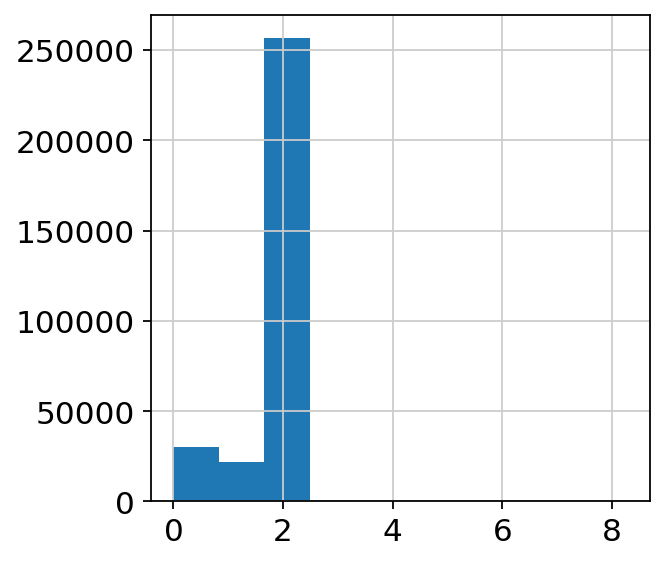

In [37]:
__test.loc['Endo'].hist()

<AxesSubplot:>

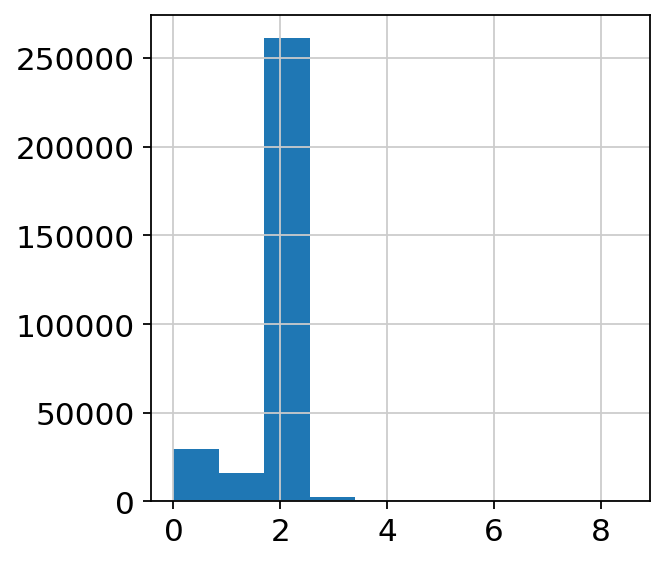

In [38]:
__test.loc['ODC'].hist()

<AxesSubplot:>

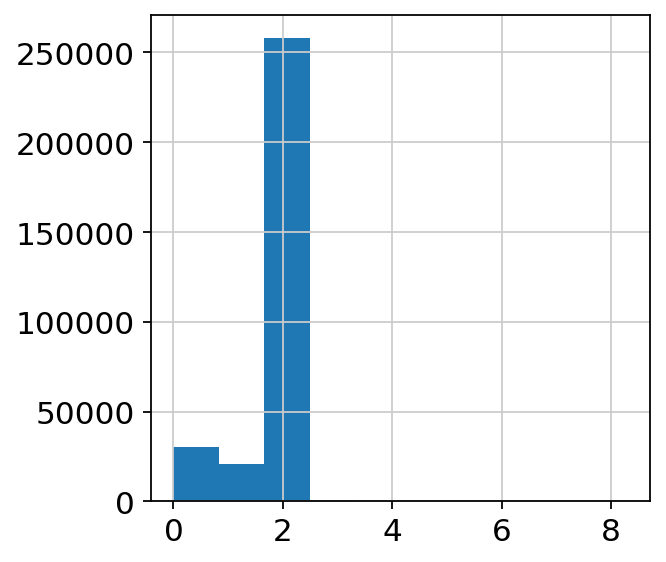

In [39]:
__test.loc['OPC'].hist()

In [42]:
__test.loc['Astro'].sort_values()

chr1_0            0.000000
chr15_19580000    0.000000
chr15_19590000    0.000000
chr15_19600000    0.000000
chr15_19610000    0.000000
                    ...   
chr10_42380000    6.615458
chr7_61960000     7.419402
chr19_27730000    7.590872
chr6_58770000     7.810304
chr1_121480000    8.384358
Name: Astro, Length: 309581, dtype: float32

In [43]:
__test.loc['Endo'].sort_values()

chr1_0            0.000000
chr15_19990000    0.000000
chr15_20900000    0.000000
chr15_20910000    0.000000
chr15_20920000    0.000000
                    ...   
chr10_42380000    6.421835
chr7_61960000     7.314044
chr19_27730000    7.471189
chr6_58770000     7.724697
chr1_121480000    8.279900
Name: Endo, Length: 309581, dtype: float32

In [44]:
__test.loc['ODC'].sort_values()

chr1_0            0.000000
chr15_19450000    0.000000
chr15_19460000    0.000000
chr15_19470000    0.000000
chr15_19480000    0.000000
                    ...   
chr10_42380000    6.871134
chr7_61960000     7.629887
chr19_27730000    7.741705
chr6_58770000     7.880611
chr1_121480000    8.500796
Name: ODC, Length: 309581, dtype: float32